In [36]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

In [37]:
# load dataset
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, pin_memory=True)
model_name = 'AE_1'
weights_dir = 'weights/MNIST'
history_dir = 'histories/MNIST'

os.makedirs(weights_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)


In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = BasicAutoencoder((1, 28, 28), 32, [256]).to(device)
torchinfo.summary(model, input_size=(1, 1, 28, 28))

opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.MSELoss()

history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name, weights_dir)
history.to_csv(os.path.join(history_dir, f'{model_name}.history.csv'))


Epoch 1: Train loss: 0.028986, Validation loss: 0.013702192977070808
Epoch 2: Train loss: 0.011421, Validation loss: 0.009570976743102073
Epoch 3: Train loss: 0.008897, Validation loss: 0.008001249395310878
Epoch 4: Train loss: 0.007749, Validation loss: 0.007205740562826395
Epoch 5: Train loss: 0.007060, Validation loss: 0.006723661640286446
Epoch 6: Train loss: 0.006611, Validation loss: 0.006385131383687258
Epoch 7: Train loss: 0.006301, Validation loss: 0.006117625092715025
Epoch 8: Train loss: 0.006059, Validation loss: 0.00600229264870286
Epoch 9: Train loss: 0.005863, Validation loss: 0.00582826775610447
Epoch 10: Train loss: 0.005711, Validation loss: 0.00571891707405448
Epoch 11: Train loss: 0.005595, Validation loss: 0.005607023599743843
Epoch 12: Train loss: 0.005482, Validation loss: 0.005451487117260695
Epoch 13: Train loss: 0.005389, Validation loss: 0.005433073142170906
Epoch 14: Train loss: 0.005305, Validation loss: 0.005384640137851239
Epoch 15: Train loss: 0.005245, 

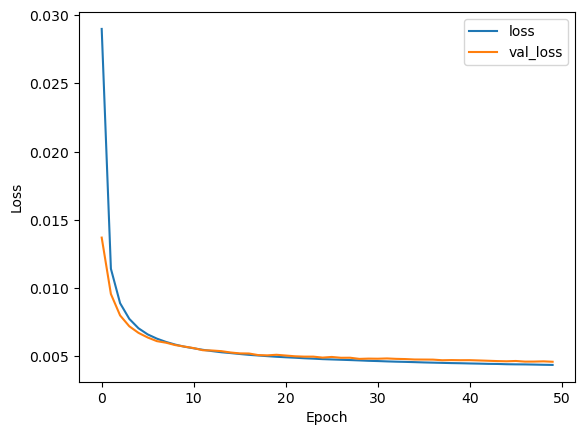

In [39]:
plot_history(model_name, history_dir)

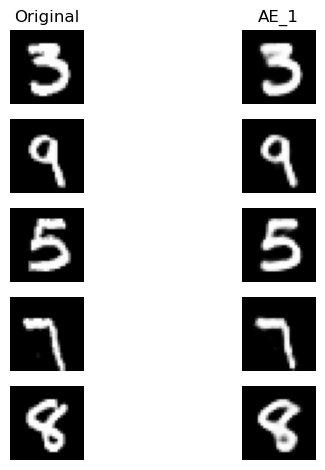

In [40]:
test_batch = next(iter(val_loader))[0][:5]
models = load_models(model_name, kind='best', model_dir=weights_dir)
show_examples(test_batch, models)